### Check and draw diagram using Single Dice (Probability Distribution)

In [34]:
import pandas as pd
import numpy as np
import random

In [35]:
# Make a list and fill random dice value
list = []
#random.seed(42)
for i in range(10000):
    list.append(random.randint(1, 6))

In [36]:
# first first 4 element
list[:5]

[5, 6, 1, 2, 6]

In [37]:
value_count = pd.Series(list).value_counts()
s = (value_count / value_count.sum()).sort_index()
s

1    0.1671
2    0.1690
3    0.1686
4    0.1655
5    0.1643
6    0.1655
Name: count, dtype: float64

<Axes: >

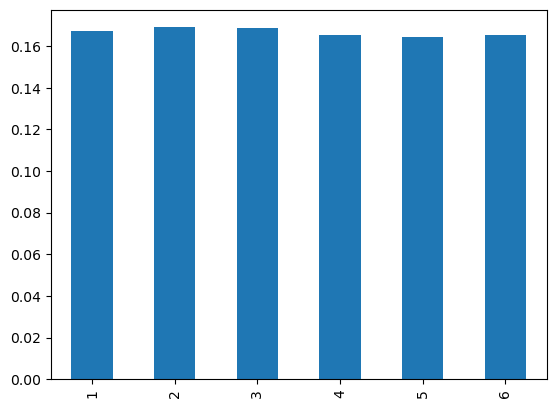

In [38]:
# Plot bar chart
s.plot(kind='bar')

### Check and draw diagram using 2 Dice (Probability Distribution)

In [39]:
multiple_dice_list = []
for i in range(10000):
    a = random.randint(1, 6)
    b = random.randint(1, 6)
    multiple_dice_list.append(a + b)

In [40]:
multiple_dice_list[:5]

[10, 3, 6, 5, 4]

In [41]:
value_counts = pd.Series(multiple_dice_list).value_counts()
series = (value_counts / value_counts.sum()).sort_index()

In [42]:
np.cumsum(s) #Calculating CDF

1    0.1671
2    0.3361
3    0.5047
4    0.6702
5    0.8345
6    1.0000
Name: count, dtype: float64

<Axes: >

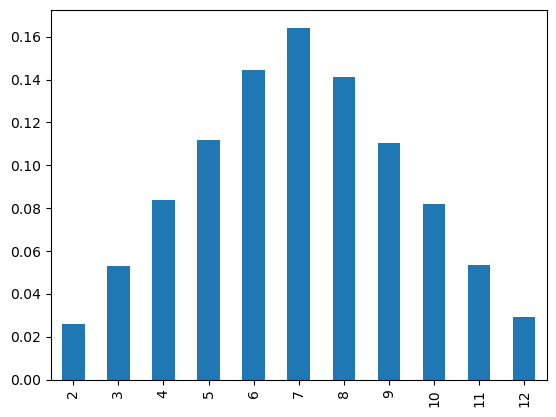

In [43]:
series.plot(kind = 'bar')

<Axes: >

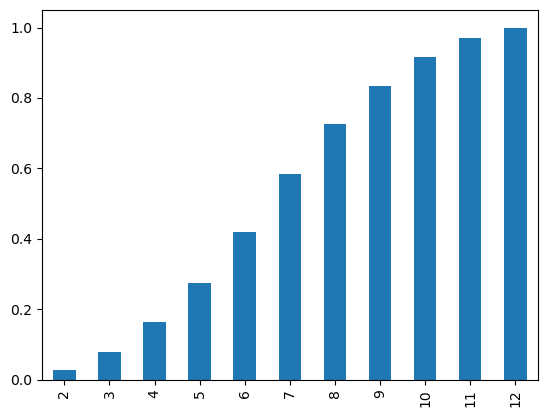

In [44]:
np.cumsum(series).plot(kind='bar')

### Parametric Dendity Estimation(PDF)

In [45]:
import matplotlib.pyplot as plt
from numpy.random import normal

In [46]:
# Get random 1000 records with mean 50 and scale 5
sample = normal(loc=50, scale=5, size=1000)

In [47]:
sample.mean()

np.float64(49.74553387926712)

(array([ 11.,  30.,  94., 207., 270., 236., 113.,  26.,  12.,   1.]),
 array([34.0470244 , 37.48677119, 40.92651798, 44.36626476, 47.80601155,
        51.24575833, 54.68550512, 58.1252519 , 61.56499869, 65.00474547,
        68.44449226]),
 <BarContainer object of 10 artists>)

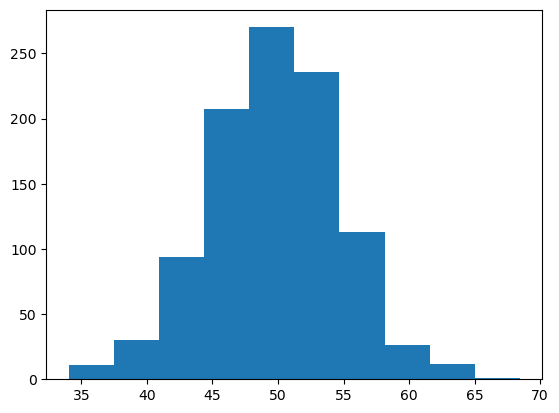

In [48]:
# histogram plaot to understand distribution of data
plt.hist(sample, bins=10)

In [49]:
sample_mean = sample.mean()
sample_std_div = sample.std()

In [50]:
sample_mean, sample_std_div

(np.float64(49.74553387926712), np.float64(4.962085926485228))

In [51]:
#fit the distribution with above calculated mean and std_div
from scipy.stats import norm

dist = norm(60, 12)

In [52]:
values = np.linspace(sample.min(), sample.max(), 100)

In [53]:
sample.max(), sample.min()

(np.float64(68.44449226053388), np.float64(34.04702440444178))

In [54]:
probabilities = [dist.pdf(value) for value in values]

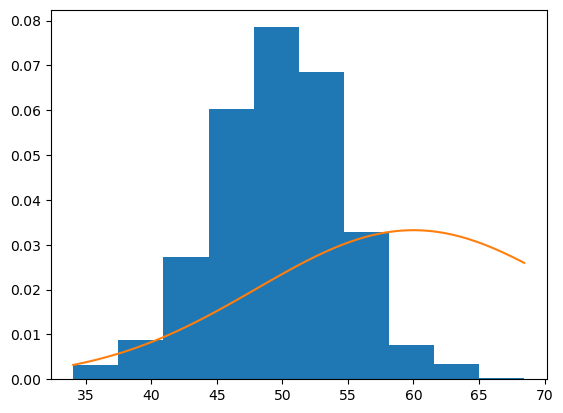

In [55]:
#Plt the histogram and PDf
plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities)

In [56]:
# We can get the same result with seaborn without calculating above stuff ourself
import seaborn as sns
sns.distplot(sample)

ModuleNotFoundError: No module named 'seaborn'

### Kernel Density Estimation (KDE)

In [67]:
# Generate sample data
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

(array([ 1.,  0.,  1.,  1.,  0.,  5.,  4.,  7.,  8.,  9., 11., 19., 29.,
        21., 28., 15., 25., 18., 21., 24., 20., 12.,  7., 15.,  8., 12.,
        13., 22., 27., 38., 42., 35., 57., 53., 44., 58., 57., 53., 43.,
        37., 30., 30., 15., 10.,  5.,  6.,  0.,  3.,  0.,  1.]),
 array([ 4.42770602,  5.44586958,  6.46403314,  7.4821967 ,  8.50036026,
         9.51852383, 10.53668739, 11.55485095, 12.57301451, 13.59117807,
        14.60934163, 15.6275052 , 16.64566876, 17.66383232, 18.68199588,
        19.70015944, 20.71832301, 21.73648657, 22.75465013, 23.77281369,
        24.79097725, 25.80914081, 26.82730438, 27.84546794, 28.8636315 ,
        29.88179506, 30.89995862, 31.91812218, 32.93628575, 33.95444931,
        34.97261287, 35.99077643, 37.00893999, 38.02710356, 39.04526712,
        40.06343068, 41.08159424, 42.0997578 , 43.11792136, 44.13608493,
        45.15424849, 46.17241205, 47.19057561, 48.20873917, 49.22690273,
        50.2450663 , 51.26322986, 52.28139342, 53.29955698,

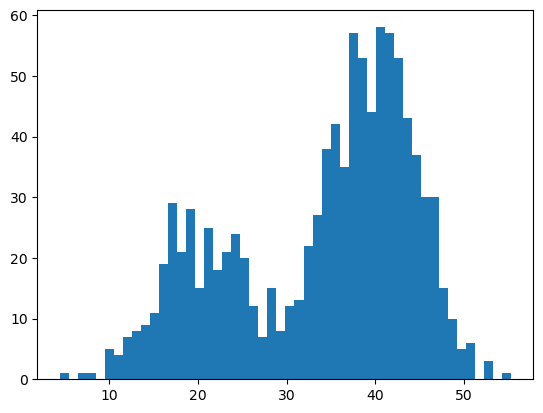

In [68]:
plt.hist(sample, bins=50)

In [77]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

#convert 1-D array to 2-D because model won't support 1-D

sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [74]:
values = np.linspace(sample.min(), sample.max(), 100) # Generate 100 random number in b/w min and max value of sample
values = values.reshape((len(values), 1))

In [78]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities) # score_samples(values) returns the log-density estimate of the input samples values. This is because the score_samples() method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate

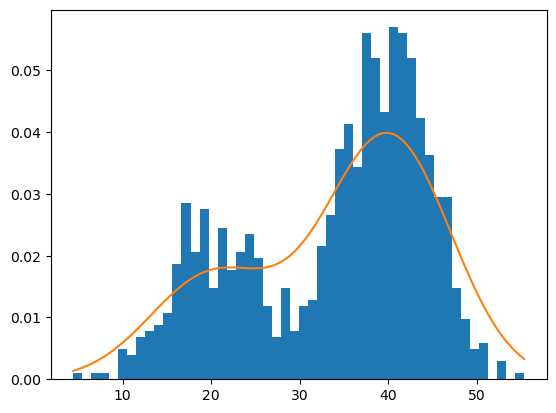

In [79]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)